In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

1. [Load Data](#1-Load-data)
2. [Fix year from start dates](#2-Fix-yr_from_start)
3. [Create growth metrics](#3-Create-growth-metrics)  
      1. [img count](#3.1-img-count-growth)
      2. [publicity count](#3.2-Publicity-growth)
4. [Run regressions on subset data](#4-Subset-data-and-run-regressions)

# 1-Load data

In [2]:
pd.set_option('max_columns', 200)
plt.style.use('ggplot')

In [3]:
in_file = pd.read_csv('../data/startup_url_list.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
html = pd.read_csv('../data/3_final_webpage_metadata.csv')
hmtlOgCols = html.columns

In [5]:
html = html.merge(in_file, on='entityid')

In [6]:
html

,Unnamed: 0,entityid,yr_from_start,capture_yr,capture_m,file_path,file_exists,website_size_kb,careers,blog,login,contact,team,about,news,faq,call_to_action,testimonial,title,description,keywords,p_count,h_count,img_count,a_count,table_count,form_count,script_count,entityname,new_industrygroup,state,weburl,pb_companyid,startdate,lastVC,ownershipstatus,exit_date
0,0,100035,5,2001,9,data/html/100035/2001/09/index.html,1,1.793945,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
1,1,100035,5,2002,1,data/html/100035/2002/01/index.html,1,1.791016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
2,2,100035,5,2002,7,data/html/100035/2002/07/index.html,1,9.054688,1,0,0,1,0,0,1,0,0,0,1,1,1,6,0,23,23,7,0,3,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
3,3,100035,6,2002,9,data/html/100035/2002/09/index.html,1,9.054688,1,0,0,1,0,0,1,0,0,0,1,1,1,6,0,23,23,7,0,3,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
4,4,100035,16,2012,8,data/html/100035/2012/08/index.html,1,0.032227,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830492,830492,728936,0,2021,9,data/html/728936/2021/09/index.html,1,609.729492,0,0,0,1,0,1,1,0,1,0,1,1,0,45,16,16,51,0,1,51,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN
830493,830493,728936,0,2022,2,data/html/728936/2022/02/index.html,1,651.221680,0,0,0,1,0,1,1,0,1,0,1,1,0,45,12,17,54,0,1,52,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN
830494,830494,728936,0,2022,9,data/html/728936/2022/09/index.html,1,570.644531,0,0,0,1,0,1,1,0,1,0,1,1,0,38,16,8,49,0,1,49,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN
830495,830495,728936,1,2023,5,data/html/728936/2023/05/index.html,1,596.093750,0,0,0,1,0,1,1,0,1,0,1,1,0,37,17,9,50,0,1,46,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN


In [7]:
html.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [8]:
html.head()

,entityid,yr_from_start,capture_yr,capture_m,file_path,file_exists,website_size_kb,careers,blog,login,contact,team,about,news,faq,call_to_action,testimonial,title,description,keywords,p_count,h_count,img_count,a_count,table_count,form_count,script_count,entityname,new_industrygroup,state,weburl,pb_companyid,startdate,lastVC,ownershipstatus,exit_date
0,100035,5,2001,9,data/html/100035/2001/09/index.html,1,1.793945,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
1,100035,5,2002,1,data/html/100035/2002/01/index.html,1,1.791016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
2,100035,5,2002,7,data/html/100035/2002/07/index.html,1,9.054688,1,0,0,1,0,0,1,0,0,0,1,1,1,6,0,23,23,7,0,3,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
3,100035,6,2002,9,data/html/100035/2002/09/index.html,1,9.054688,1,0,0,1,0,0,1,0,0,0,1,1,1,6,0,23,23,7,0,3,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
4,100035,16,2012,8,data/html/100035/2012/08/index.html,1,0.032227,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN


# 2-Fix `yr_from_start`

In [9]:
def redo_yfs(x):
    startyr = str(x.startdate)[:4]
    startm = str(x.startdate)[4:6]
    if startyr == "nan":
        startyr = str(x.lastVC)[:4]
        startm = str(x.lastVC)[4:6]
    yfs = (int(x.capture_yr) - int(startyr)) + ((int(x.capture_m) - int(startm)) / 12)
    
    return (round(yfs * 2) / 2)

In [10]:
html['yr_from_start'] = html.apply(redo_yfs, axis=1)

In [11]:
html

,entityid,yr_from_start,capture_yr,capture_m,file_path,file_exists,website_size_kb,careers,blog,login,contact,team,about,news,faq,call_to_action,testimonial,title,description,keywords,p_count,h_count,img_count,a_count,table_count,form_count,script_count,entityname,new_industrygroup,state,weburl,pb_companyid,startdate,lastVC,ownershipstatus,exit_date
0,100035,5.0,2001,9,data/html/100035/2001/09/index.html,1,1.793945,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
1,100035,5.0,2002,1,data/html/100035/2002/01/index.html,1,1.791016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
2,100035,5.5,2002,7,data/html/100035/2002/07/index.html,1,9.054688,1,0,0,1,0,0,1,0,0,0,1,1,1,6,0,23,23,7,0,3,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
3,100035,6.0,2002,9,data/html/100035/2002/09/index.html,1,9.054688,1,0,0,1,0,0,1,0,0,0,1,1,1,6,0,23,23,7,0,3,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
4,100035,15.5,2012,8,data/html/100035/2012/08/index.html,1,0.032227,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Tesaria,Information Technology,CA,www.tesaria.com,NaN,1997-02-01,2000-06-30,Out of Business,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830492,728936,0.0,2021,9,data/html/728936/2021/09/index.html,1,609.729492,0,0,0,1,0,1,1,0,1,0,1,1,0,45,16,16,51,0,1,51,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN
830493,728936,0.0,2022,2,data/html/728936/2022/02/index.html,1,651.221680,0,0,0,1,0,1,1,0,1,0,1,1,0,45,12,17,54,0,1,52,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN
830494,728936,1.0,2022,9,data/html/728936/2022/09/index.html,1,570.644531,0,0,0,1,0,1,1,0,1,0,1,1,0,38,16,8,49,0,1,49,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN
830495,728936,1.5,2023,5,data/html/728936/2023/05/index.html,1,596.093750,0,0,0,1,0,1,1,0,1,0,1,1,0,37,17,9,50,0,1,46,Truthset Inc.,Information Technology,CA,www.truthset.io,338510-53,NaN,2022-03-22,Private & Independent,NaN


In [12]:
html.to_csv('../data/4_final_webpage_metadata.csv', index=False)

# 3-Create growth metrics

Prep - split our dataframe into groups by `entityid`

TODO: Figure out a more efficient way to do this. Like lapply() in R...

In [537]:
company_groups = html.groupby('entityid')['img_count'].mean()

In [608]:
html.groupby('entityid')['img_count'].mean()

entityid
53131         44.333333
53138         23.692308
53139          4.300000
53142         33.500000
53147         27.833333
                ...    
1052271254    28.000000
1052272415    10.285714
1052276600    13.000000
1052277716     7.285714
1052278175    24.000000
Name: img_count, Length: 63112, dtype: float64

Define a general function that will be able to calculate growth rates given a group (df), beginning time, end time, and metric...

In [538]:
def calculate_metric(cg, start, end, metric):
    start_id = cg['yr_from_start'].sub(start).abs().idxmin()
    start_yr = cg.loc[start_id, 'yr_from_start']
    start_val = cg.loc[start_id][metric]
    end_id = cg['yr_from_start'].sub(end).abs().idxmin()
    if start_id == end_id:
        return None
    end_val = cg.loc[end_id, metric]
    if start_val == 0:
        # This is NaN if it starts out at zero
        return None
    return (end_val - start_val) / start_val

Define new dataframe that we'll use for regression

In [539]:
regression_df = pd.DataFrame()

In [540]:
regression_df['entityid'] = html.entityid.unique()
regression_df = regression_df.set_index('entityid')

### 3.1-`img` count growth

Growth rate in number of images from year 0 to 3

TODO: Convert to percentage
TODO: Make more efficient

In [541]:
count = 0
for name, group in company_groups:
    if count % 10000 == 0:
        print(count)
    count += 1
    if len(group.index) == 1:
        continue
    regression_df.loc[name, 'img_growth'] = calculate_metric(group, 0, 3, 'img_count')
    

0
10000
20000
30000
40000
50000
60000


In [542]:
regression_df

,img_growth
entityid,
100035,NaN
100065,-3.0
1001046863,NaN
100105,4.0
1001057618,NaN
...,...
1052276600,NaN
1052278175,NaN
714044,NaN


### 3.2-*Publicity* growth

"Publicity" measures of the sum of links the HTML page has that relate to the firm's oppenness. The list includes `careers, blog, contact, team, about, news, faq, call_to_action, testimonial`. As you can imagine, a web-page that has links for *all* of these pages is considered to be quite open, and vice-versa.

In [544]:
def calculate_publicity_score(cg, start, end):
    pub_list = ['careers', 'blog', 'contact', 'team', 'about', 'news', 'faq', 'call_to_action', 'testimonial']
    start_id = cg['yr_from_start'].sub(start).abs().idxmin()
    start_val = cg.loc[start_id, pub_list].sum()
    end_id = cg['yr_from_start'].sub(end).abs().idxmin()
    if start_id == end_id:
        return None
    end_val = cg.loc[end_id, pub_list].sum()
    return (end_val - start_val)

In [545]:
count = 0
for name, group in company_groups:
    if count % 10000 == 0:
        print(count)
    count += 1
    if len(group.index) == 1:
        continue
    regression_df.loc[name, 'publicity_growth'] = calculate_publicity_score(group, 0, 3)

0
10000
20000
30000
40000
50000
60000


In [546]:
regression_df.publicity_growth.describe()

count    49681.000000
mean         0.611562
std          1.755953
min         -8.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          9.000000
Name: publicity_growth, dtype: float64

# 4-Subset data and run regressions

*Add company lifespan (in years)*

In [653]:
html["has_exit"] = (html["exit_date"].isna() == False).astype('int8')
html["end_yr"] = html["exit_date"].str.slice(start=0, stop=4).astype('float' ,errors='ignore').fillna(2023)
html["start_yr"] = html["startdate"].str.slice(start=0, stop=4).fillna(html["lastVC"].str.slice(start=0, stop=4)).astype('float', errors='ignore')
html["lifespan"] = html["end_yr"] - html["start_yr"]

Exited via acquisition or IPO in 7 years.

In [548]:
html.ownershipstatus.value_counts(normalize=True)

Private & Independent    0.695786
Acquired/Merged          0.170996
Out of Business          0.106580
Publicly-held            0.018914
Assets Acquired          0.006000
In Bankruptcy            0.001061
In IPO Registration      0.000663
Name: ownershipstatus, dtype: float64

In [549]:
html.columns

Index(['entityid', 'yr_from_start', 'capture_yr', 'capture_m', 'file_path',
       'file_exists', 'website_size_kb', 'careers', 'blog', 'login', 'contact',
       'team', 'about', 'news', 'faq', 'call_to_action', 'testimonial',
       'title', 'description', 'keywords', 'p_count', 'h_count', 'img_count',
       'a_count', 'table_count', 'form_count', 'script_count', 'entityname',
       'new_industrygroup', 'state', 'weburl', 'pb_companyid', 'startdate',
       'lastVC', 'ownershipstatus', 'exit_date', 'has_exit', 'end_yr',
       'start_yr', 'lifespan'],
      dtype='object')

## Scatter plots

In [550]:
def subset_data(data, acq, time):
    data = data[(data.ownershipstatus.isin(acq)) & (data.lifespan == time)]
    return data

In [551]:
html.ownershipstatus.unique()

array(['Out of Business', 'Acquired/Merged', 'Private & Independent',
       'Publicly-held', 'Assets Acquired', 'In Bankruptcy',
       'In IPO Registration'], dtype=object)

In [552]:
acq_7 = subset_data(html, ['Acquired/Merged', 'Publicly-held'], 7)
priv_7 = subset_data(html, ['Private & Independent'], 7)
failed_7 = subset_data(html, ['Out of Business'], 7)

*`img_count`*

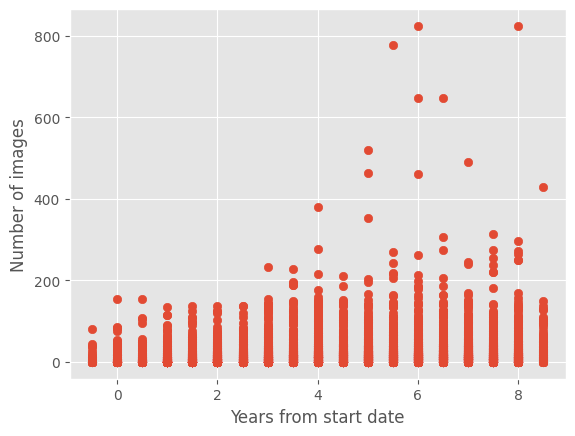

In [598]:
plt.scatter(acq_7.yr_from_start, acq_7.img_count)
plt.xlabel('Years from start date')
plt.ylabel('Number of images')
plt.show()

*Publicity*

In [554]:
acq_7.groupby('yr_from_start')[['careers', 'blog', 'contact', 'team', 'about', 'news', 'faq', 'call_to_action', 'testimonial']].mean().sum(axis=1)


yr_from_start
-0.5    3.301887
 0.0    3.236111
 0.5    3.381132
 1.0    3.422261
 1.5    3.552102
 2.0    3.461638
 2.5    3.401225
 3.0    3.461725
 3.5    3.464338
 4.0    3.423256
 4.5    3.378082
 5.0    3.448568
 5.5    3.437582
 6.0    3.411215
 6.5    3.470366
 7.0    3.489648
 7.5    3.552133
 8.0    3.484268
 8.5    3.615894
dtype: float64

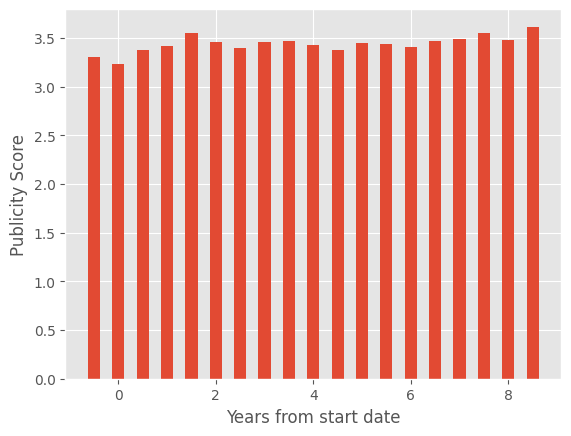

In [600]:
data = acq_7.groupby('yr_from_start')[['careers', 'blog', 'contact', 'team', 'about', 'news', 'faq', 'call_to_action', 'testimonial']].mean().sum(axis=1)
plt.bar(data.index, data, width=0.25)
plt.xlabel('Years from start date')
plt.ylabel('Publicity Score')
plt.show()


## Bar Plot

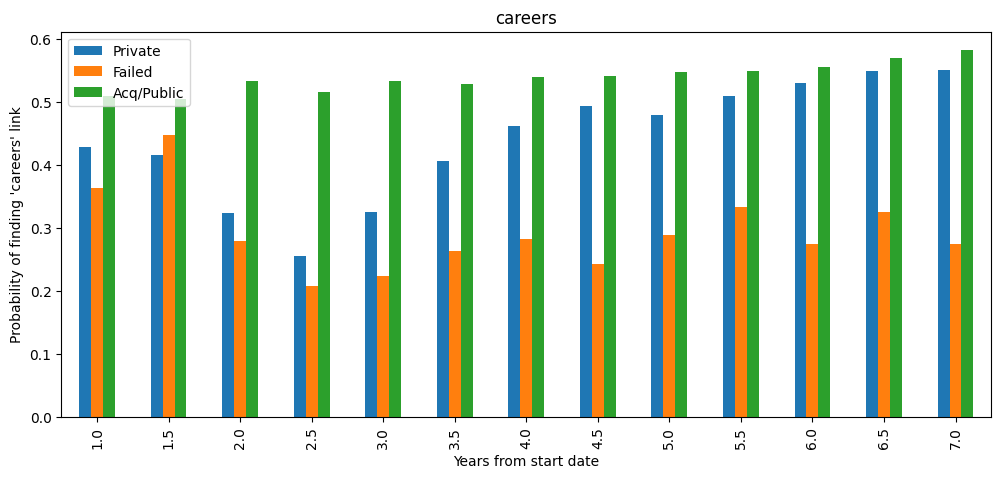

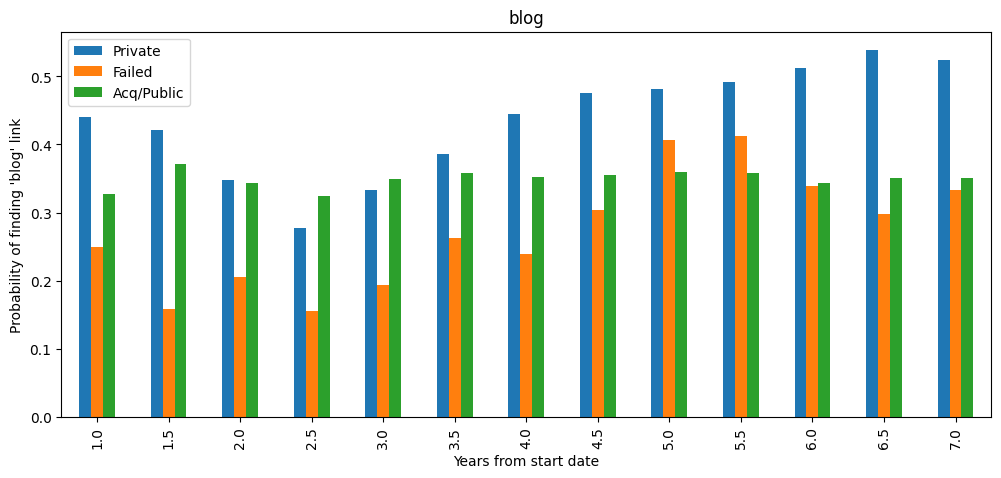

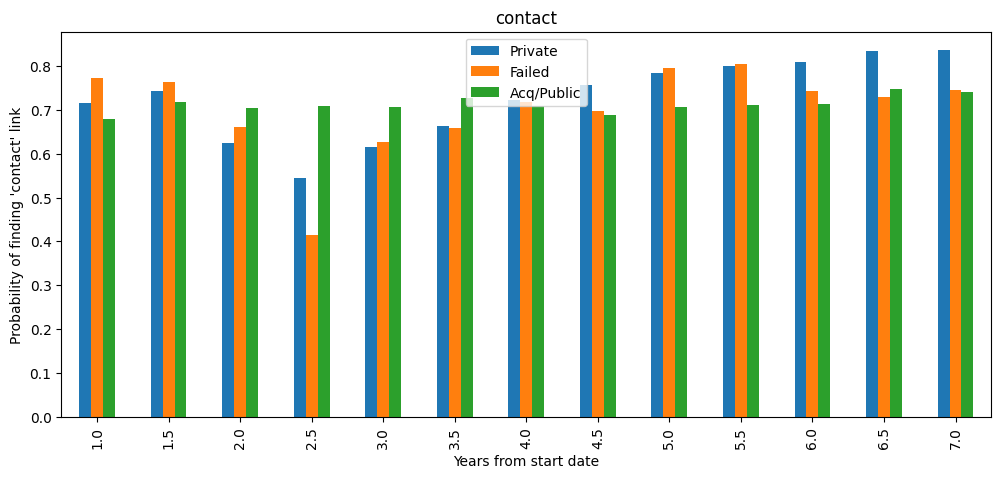

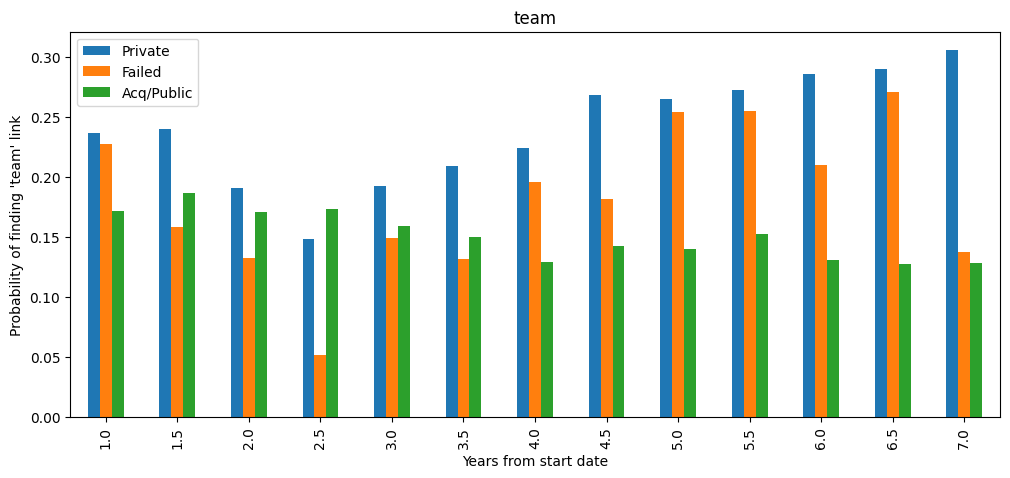

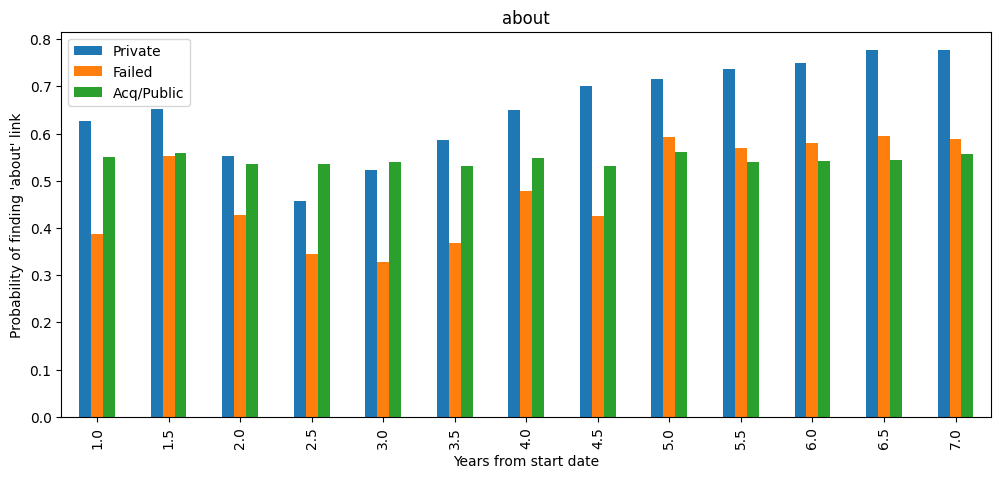

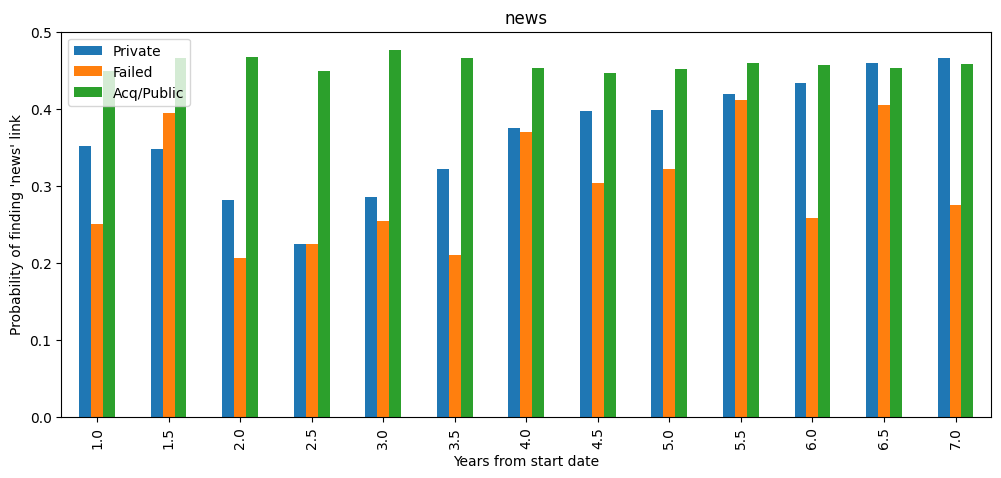

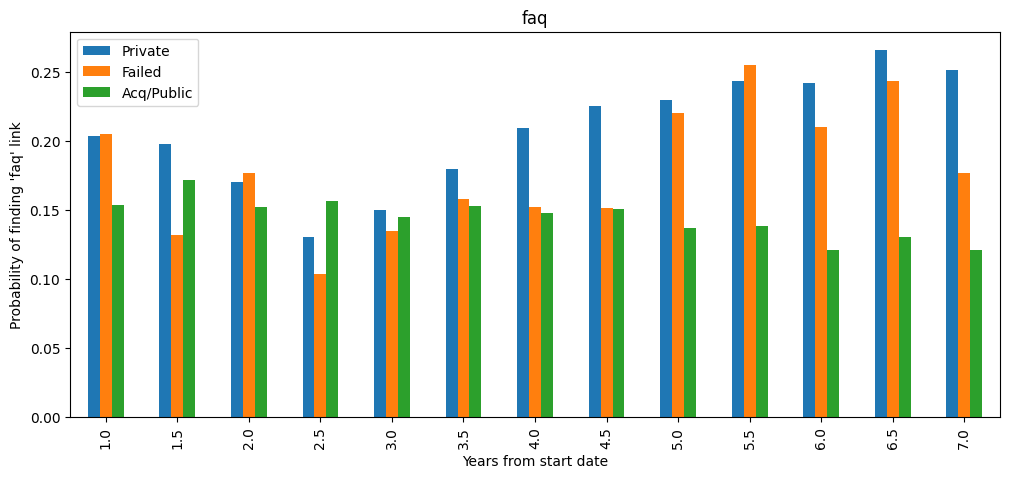

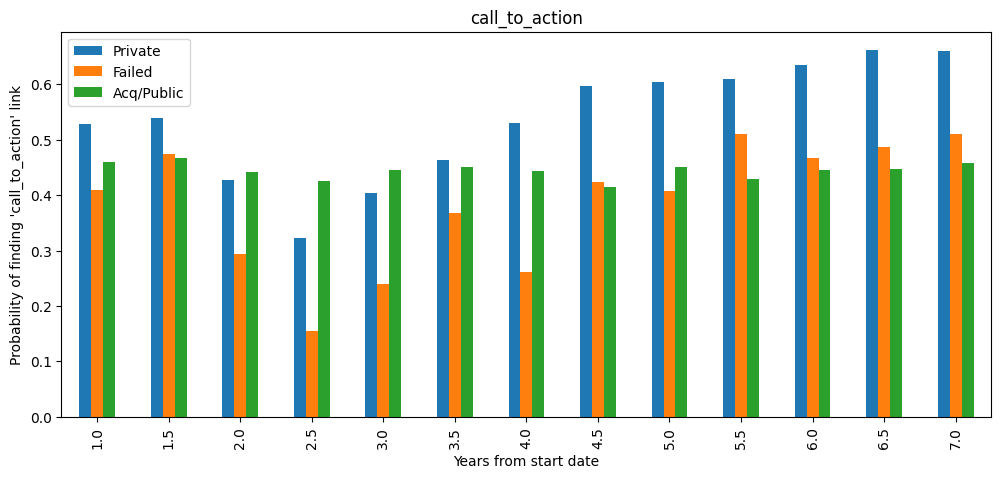

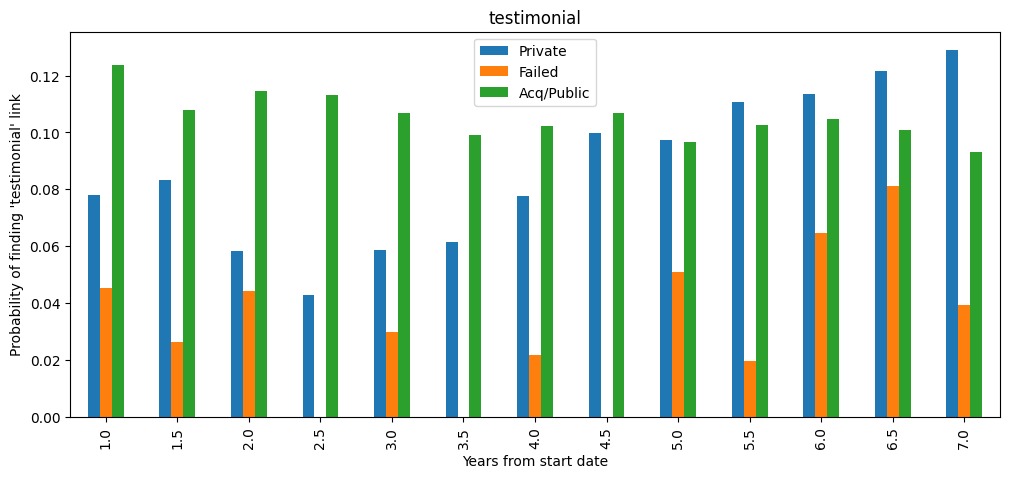

In [579]:
cols = ['careers', 'blog', 'contact', 'team', 'about', 'news', 'faq', 'call_to_action', 'testimonial']


for i in range(len(cols)):
        grouped_priv = pd.Series(priv_7.groupby('yr_from_start')[cols[i]].mean(), name="Private")[1:7]
        grouped_failed = pd.Series(failed_7.groupby('yr_from_start')[cols[i]].mean(), name="Failed")[1:7]
        group_acq = pd.Series(acq_7.groupby('yr_from_start')[cols[i]].mean(), name="Acq/Public")[1:7]
        grouped_data = pd.concat([grouped_priv, grouped_failed, group_acq], axis=1)
        grouped_data = grouped_data.dropna()
        grouped_data.plot(kind="bar", figsize=(12, 5))
        
        # Plot data
        plt.title(cols[i])
        plt.xlabel("Years from start date")
        plt.ylabel(f"Probability of finding '{cols[i]}' link")

plt.show()

## Pairplot

In [ ]:
grouped_priv = pd.Series(priv_7.groupby('yr_from_start')

In [586]:
alive_for_7 = html[html['lifespan'] == 7]

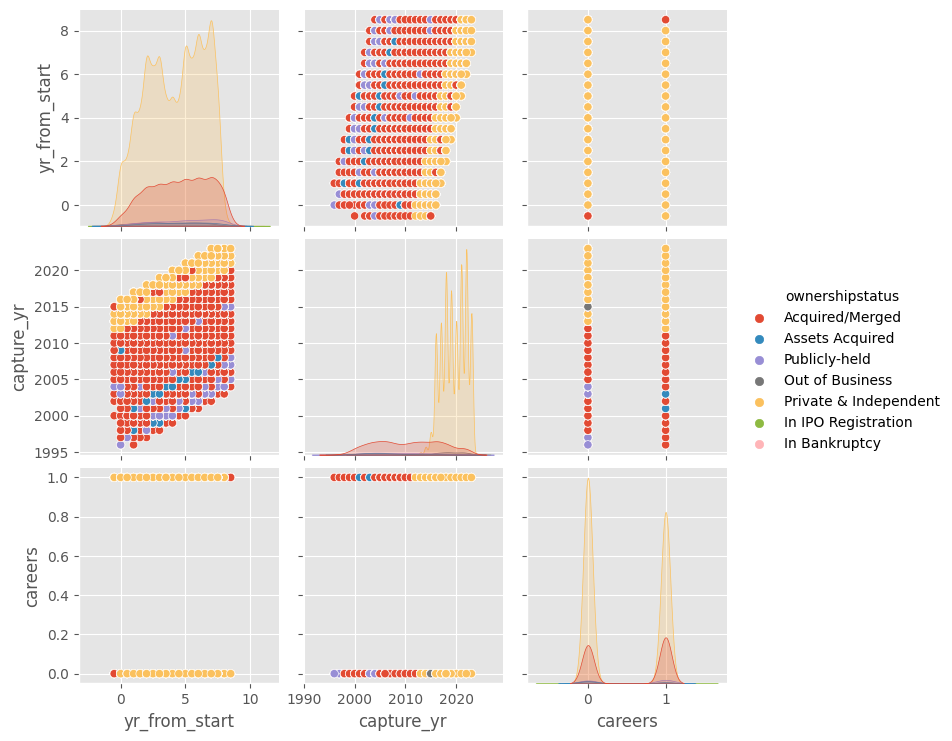

In [590]:
sns.pairplot(alive_for_7, vars=['yr_from_start', 'capture_yr', 'careers'], hue='ownershipstatus')
plt.show()

## Correlation

In [591]:
html_corr = html.select_dtypes(include='number').dropna().corr()

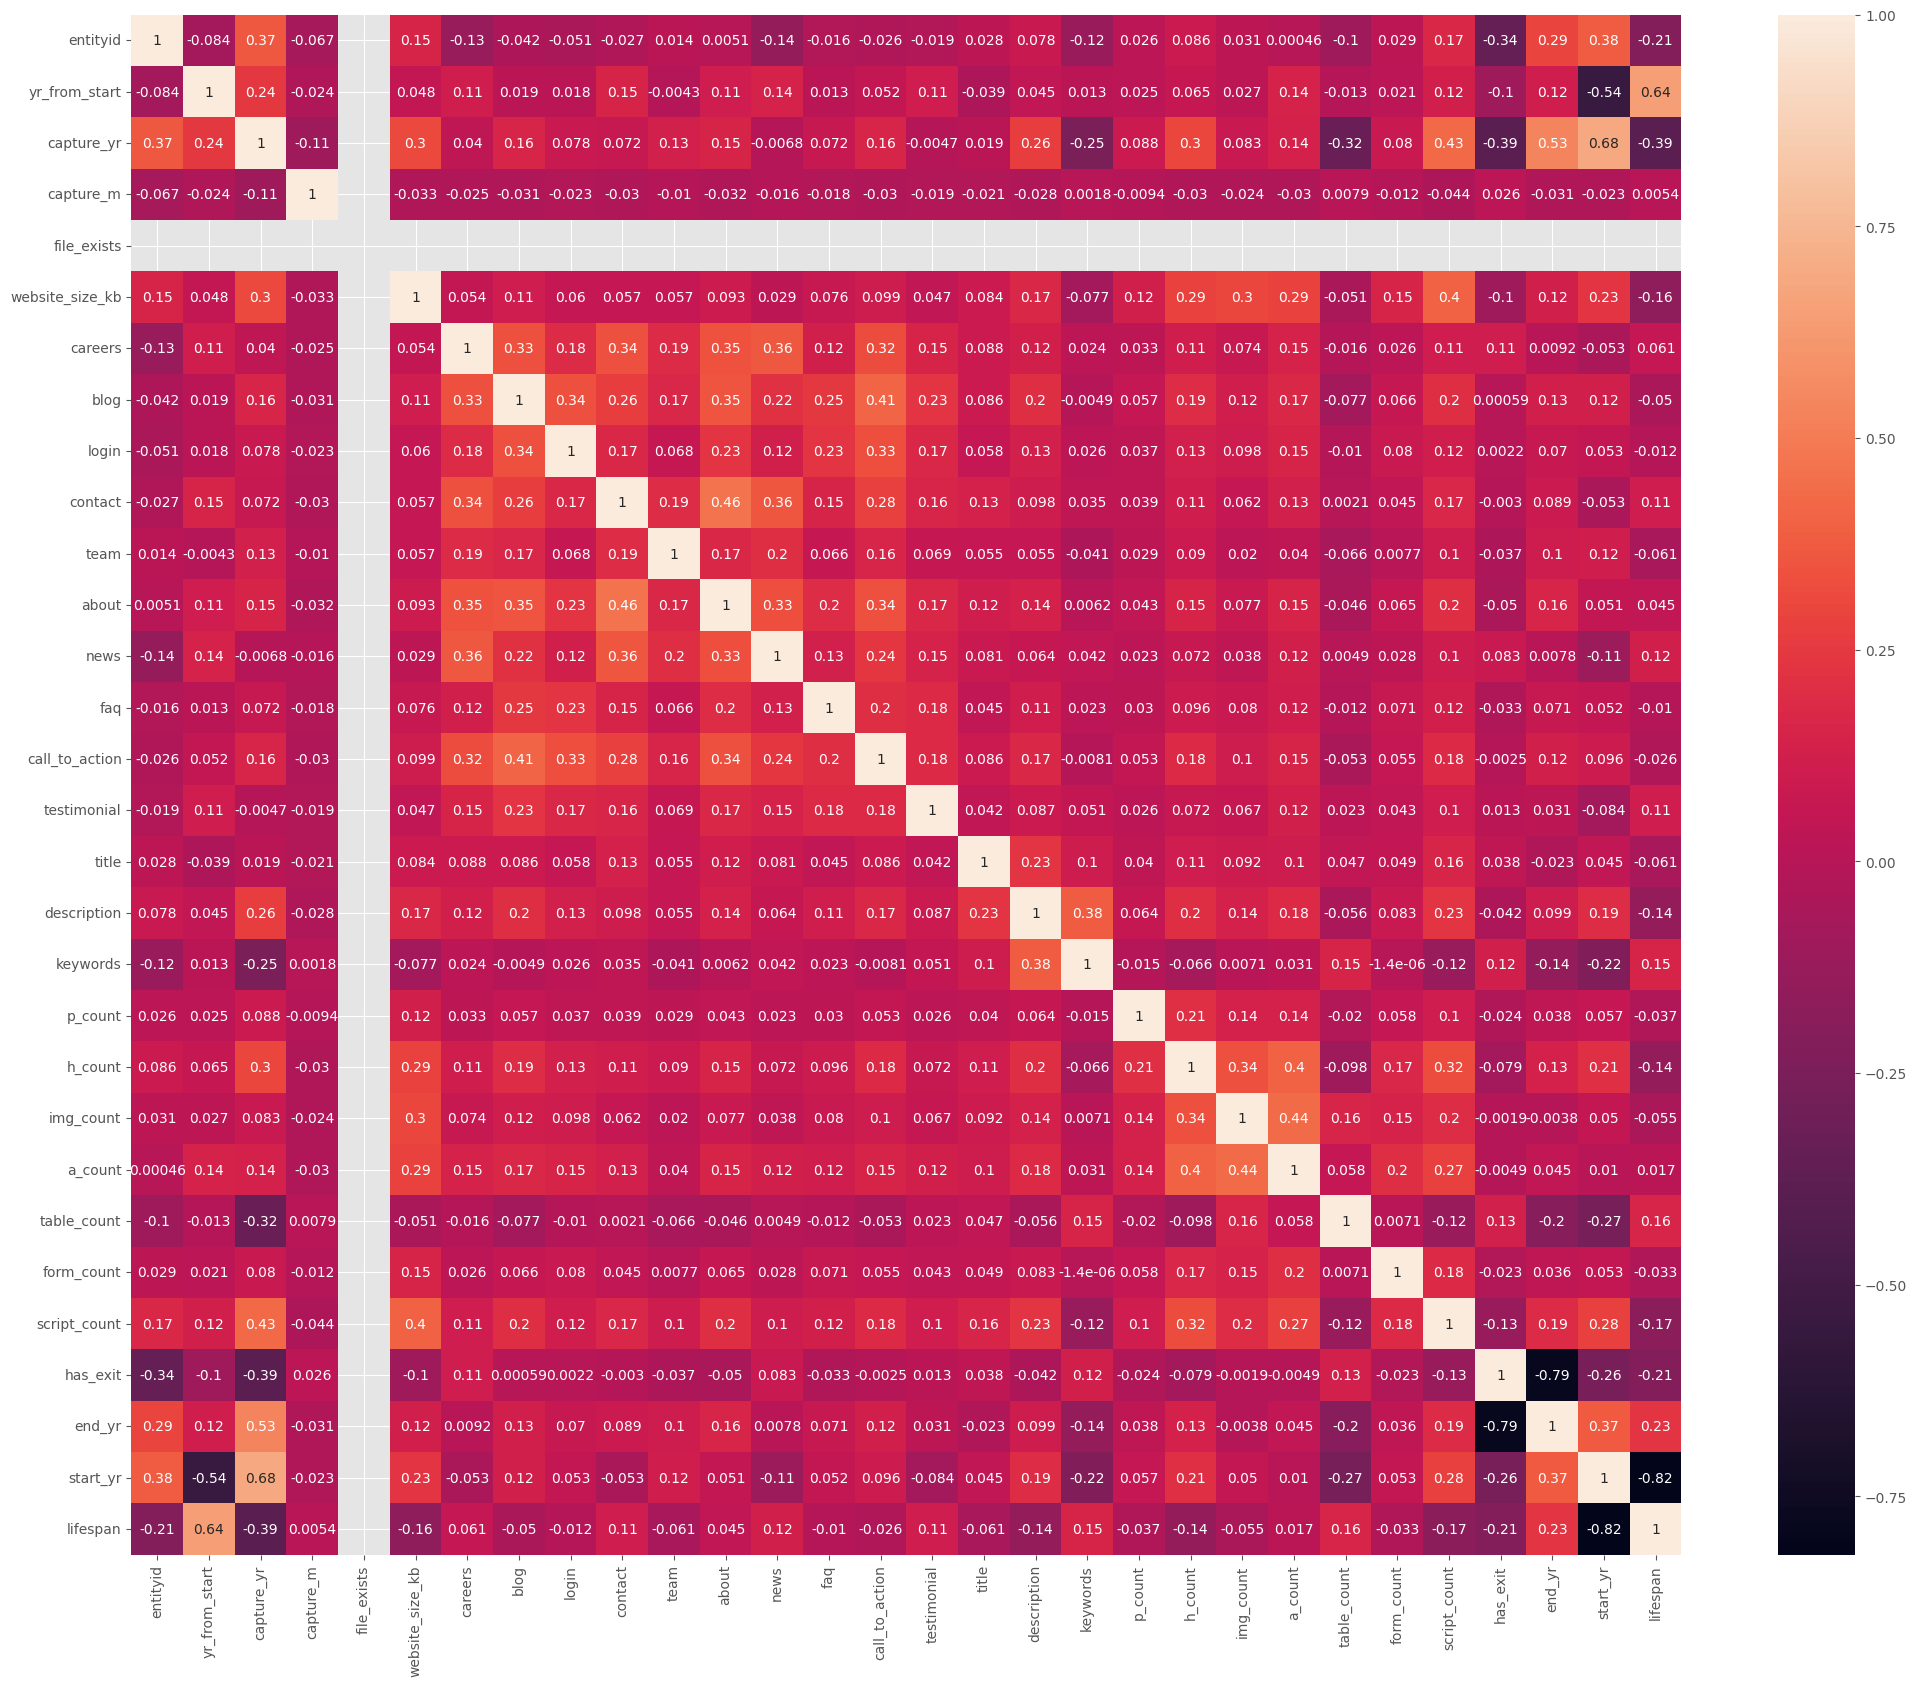

In [601]:
plt.figure(figsize=(25,20))
sns.heatmap(html_corr, annot=True)
plt.show()